In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Lenovo\Desktop\F&V\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3115 files belonging to 36 classes.


In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Lenovo\Desktop\F&V\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 359 files belonging to 36 classes.


In [12]:
cnn = tf.keras.models.Sequential()

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [19]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
train_model = cnn.fit(x=training_set,validation_data = validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 93s 852ms/step - loss: 9.7216 - accuracy: 0.0408 - val_loss: 3.4888 - val_accuracy: 0.1170
Epoch 2/30
98/98 [==============================] - 54s 517ms/step - loss: 4.3119 - accuracy: 0.0639 - val_loss: 3.3269 - val_accuracy: 0.1365
Epoch 3/30
98/98 [==============================] - 52s 505ms/step - loss: 3.7750 - accuracy: 0.1066 - val_loss: 2.9949 - val_accuracy: 0.2730
Epoch 4/30
98/98 [==============================] - 60s 586ms/step - loss: 3.4826 - accuracy: 0.1785 - val_loss: 2.8546 - val_accuracy: 0.2925
Epoch 5/30
98/98 [==============================] - 58s 556ms/step - loss: 3.6720 - accuracy: 0.2151 - val_loss: 2.1762 - val_accuracy: 0.4763
Epoch 6/30
98/98 [==============================] - 58s 559ms/step - loss: 3.0727 - accuracy: 0.2963 - val_loss: 3.2127 - val_accuracy: 0.3370
Epoch 7/30
98/98 [==============================] - 58s 560ms/step - loss: 2.9527 - accuracy: 0.3701 - val_loss: 1.8807 - val_accuracy: 0.6128

In [21]:
cnn.save('trained_model.h5')

E:\Important\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
train_model.save('save.h5')

AttributeError: 'History' object has no attribute 'save'

In [22]:
import json
with open('train_model.json','w') as f:
    json.dump(train_model.history,f)

In [23]:
print(train_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [24]:
train_model.history['val_accuracy'][-1]

0.9192200303077698

In [28]:
print("validation set accuracy: {} %".format(train_model.history['val_accuracy'][-1]*100))

validation set accuracy: 91.92200303077698 %


Text(0, 0.5, 'Training Accuracy')

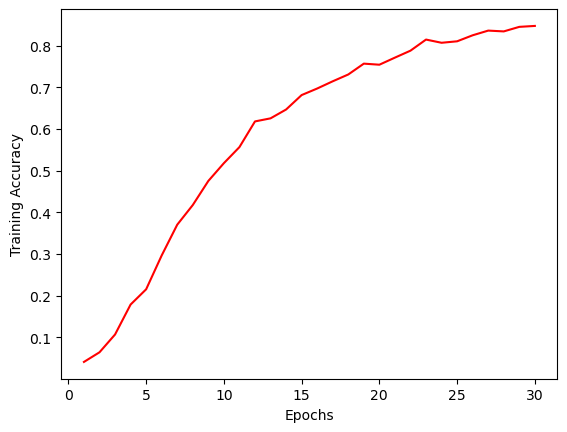

In [30]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,train_model.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')